In [12]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [13]:

# this has to be between -1 and 1 for Legvander and Chebvander
x=np.linspace(-1,1,1001)

ord=40
A=np.zeros([len(x),ord+1])
for i in range(ord+1):
    A[:,i]=x**i

u,s,v=np.linalg.svd(A,0)
print(s.min(),s.max())
# there will be Sinv in lstsq solution. if S not well behaved then fit will be terrible

A=np.polynomial.legendre.legvander(x,ord)
# A=np.polynomial.chebyshev.chebvander(x,ord)
u,s,v=np.linalg.svd(A,0)
print(s)
print('cheb/leg: ',s.min(),s.max())

5.4426029663746894e-14 36.56604653810709
[31.63899315 18.28709321 14.18318612 12.00419846 10.60528988  9.61125242
  8.86338491  8.27213811  7.79781338  7.39720398  7.065677    6.7665796
  6.51325143  6.2710802   6.06259968  5.85859229  5.68148251  5.50783203
  5.35596789  5.20720976  5.07610751  4.94755485  4.83345039  4.72124471
  4.62106124  4.52214444  4.43343081  4.34540735  4.26622804  4.18721333
  4.11603798  4.04452779  3.9801392   3.91490143  3.85632452  3.79629751
  3.74274696  3.68689429  3.63773927  3.58458235  3.53933765]
cheb/leg:  3.5393376544699837 31.63899315100503


In [108]:
class leastsq():
    
    def __init__(self, A,y, N=None):
        
        assert(A.shape[0]==y.shape[0])
        self.A = A
        self.y = y
        self.np = A.shape[1]
        self.nd = A.shape[0]
        self.N = N
    
    def fit(self):
        
        if(self.N is not None):
            #do a cholesky decomposition to recast the eqn in the form A^T*A*m = A^T*d
            L = np.linalg.cholesky(self.N)
            Linv = np.linalg.inv(L)
            self.Anew = Linv@A
            self.ynew = Linv@y
        else:
            self.Anew = self.A
            self.ynew = self.y
        
        u,s,v = np.linalg.svd(self.Anew,0)

        cn = s.max()/s.min()
        if(cn>1.e10):
            warnings.warn("The A matrix is ill-conditioned. Too large condition number. Fit may be crap.")
        s = np.eye(len(s))*s

        rhs = u.T
        lhs = s@v
        self.pinv = np.linalg.inv(lhs)@rhs
        self.params = self.pinv@self.ynew
        self.hat = np.linalg.inv(self.Anew.T@self.Anew)

    
    def get_param_cov(self):
        
        return self.hat
    
    def get_pred_err(self):
        
        covd = self.A@self.hat@self.A.T
        
        return covd
        
        
        
        

In [51]:
x = np.linspace(-5,5,100)
y = 2 + 4*x + 3*x**2

In [52]:
yobs = y + np.random.randn(len(y))

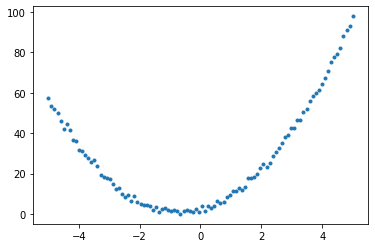

In [53]:
plt.plot(x,yobs,'.')

In [68]:
A = x[:, np.newaxis]**[0, 1, 2] # cool method to create a polynomial matrix

In [85]:
lsq = leastsq(A,yobs)
lsq.fit()

[114.29859916  29.15764651   6.65187161]
[[114.29859916   0.           0.        ]
 [  0.          29.15764651   0.        ]
 [  0.           0.           6.65187161]]


In [93]:
lsq.params

(3,)

In [94]:
ypred = A@lsq.params

In [88]:
lsq.get_param_cov()

array([[ 2.25037515e-02,  7.17229012e-19, -1.47073830e-03],
       [ 7.17229012e-19,  1.17623762e-03, -8.92784784e-20],
       [-1.47073830e-03, -8.92784784e-20,  1.72993772e-04]])

In [91]:
rcov = lsq.get_pred_err()

In [92]:
rcov.shape

(100, 100)

In [96]:
r = yobs-ypred

In [106]:
r = np.reshape(r, (len(r),1))

In [112]:
r@r.T

array([[ 1.14472988, -0.33765396,  0.90227705, ...,  0.76213312,
        -0.71014695,  1.05450763],
       [-0.33765396,  0.09959572, -0.26613913, ..., -0.22480174,
         0.20946769, -0.31104165],
       [ 0.90227705, -0.26613913,  0.71117554, ...,  0.60071397,
        -0.55973842,  0.8311638 ],
       ...,
       [ 0.76213312, -0.22480174,  0.60071397, ...,  0.50740957,
        -0.47279845,  0.70206536],
       [-0.71014695,  0.20946769, -0.55973842, ..., -0.47279845,
         0.4405482 , -0.65417649],
       [ 1.05450763, -0.31104165,  0.8311638 , ...,  0.70206536,
        -0.65417649,  0.97139628]])

In [110]:
np.sqrt(np.diag(rcov))

array([0.29409843, 0.28245902, 0.27119119, 0.26030335, 0.24980453,
       0.23970437, 0.2300131 , 0.22074151, 0.21190083, 0.20350261,
       0.19555857, 0.18808027, 0.18107889, 0.17456477, 0.16854696,
       0.16303269, 0.15802682, 0.15353123, 0.14954423, 0.14606014,
       0.14306886, 0.14055574, 0.13850156, 0.13688278, 0.13567197,
       0.13483846, 0.13434907, 0.13416889, 0.13426218, 0.13459302,
       0.13512611, 0.13582724, 0.13666379, 0.13760501, 0.13862228,
       0.13968919, 0.14078158, 0.14187754, 0.14295734, 0.14400334,
       0.14499986, 0.14593313, 0.14679109, 0.14756335, 0.14824103,
       0.14881672, 0.14928436, 0.14963919, 0.14987768, 0.1499975 ,
       0.1499975 , 0.14987768, 0.14963919, 0.14928436, 0.14881672,
       0.14824103, 0.14756335, 0.14679109, 0.14593313, 0.14499986,
       0.14400334, 0.14295734, 0.14187754, 0.14078158, 0.13968919,
       0.13862228, 0.13760501, 0.13666379, 0.13582724, 0.13512611,
       0.13459302, 0.13426218, 0.13416889, 0.13434907, 0.13483

In [70]:
from sklearn.linear_model import LinearRegression

In [73]:
reg = LinearRegression(fit_intercept=False).fit(A, yobs)

In [74]:
reg.coef_


array([2.27209798, 4.04846101, 2.97059892])

# zenith analysis

In [3]:
data = np.loadtxt('../q3/dish_zenith.txt')

In [89]:
A = np.zeros((data.shape[0],4))
A[:,0] = data[:,0]**2 + data[:,1]**2 # x^2 + y^2
A[:,1] = data[:,0]
A[:,2] = data[:,1]
A[:,3] = 1
y = data[:,2]

# A = np.zeros((data.shape[0],5))
# A[:,0] = data[:,0]**2
# A[:,1] = data[:,1]**2
# A[:,2] = data[:,0]
# A[:,3] = data[:,1]
# A[:,4] = 1
# y = data[:,2]

In [113]:
lsq = leastsq(A,y)
lsq.fit()

In [114]:
m = lsq.params

In [47]:
m

array([-6.13125429e-05, -7.75224853e-02,  2.57376443e-02, -5.96691021e+02])

In [115]:
a = m[0]
x0 = -0.5*m[1]/a
y0 = -0.5*m[2]/a
z0 = m[3]-x0**2-y0**2
print(f"params of the paraboloid are:\na\t= {a:4.2e}\nx0\t= {x0:4.2f}\ny0\t= {y0:4.2f}\nz0\t= {z0:4.2f}")


# a = m[0]
# x0 = -0.5*m[1]/a
# y0 = -0.5*m[2]/a
# z0 = m[3]-x0**2-y0**2
# print(f"params of the paraboloid are:\na\t= {a:4.2e}\nx0\t= {x0:4.2f}\ny0\t= {y0:4.2f}\nz0\t= {z0:4.2f}")

params of the paraboloid are:
a	= 1.67e-04
x0	= -1.36
y0	= 58.22
z0	= -4903.90


In [116]:
ypred = A@m
resd = y-ypred
rmserr = np.sqrt(np.mean(resd**2))
print(f"rms err is {rmserr: 4.2f} mm")

rms err is  3.77 mm


In [119]:
N = np.eye(y.shape[0])

In [120]:
chisq = resd.T@N@resd
print(chisq)

6745.178681664257


In [ ]:
mcov = lsq.get_param_cov()
merr = np.sqrt(np.diag(mcov))

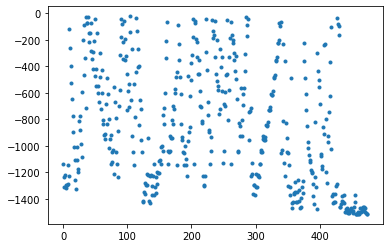

In [60]:
plt.plot(range(0,len(y)),y,'.')

In [33]:
bin_std, bin_edges, bin_num = stats.binned_statistic(data[:,2],resd,statistic='mean')

In [71]:
(bin_std)

array([1.54022479, 1.60986527, 2.18683648, 2.2647294 , 2.79451534,
       3.14700318, 3.98961269, 5.02847858, 6.06118406, 6.95594877])

In [35]:
bin_std, bin_edges, bin_num = stats.binned_statistic(data[:,2],resd,statistic='std')

In [86]:
bin_std**2

array([ 2.3722924 ,  2.59166617,  4.7822538 ,  5.12899927,  7.80931599,
        9.90362902, 15.9170094 , 25.28559683, 36.73795222, 48.38522323])

In [87]:
bin_edges

array([-1514.049 , -1364.8573, -1215.6656, -1066.4739,  -917.2822,
        -768.0905,  -618.8988,  -469.7071,  -320.5154,  -171.3237,
         -22.132 ])

TypeError: zip argument #2 must support iteration

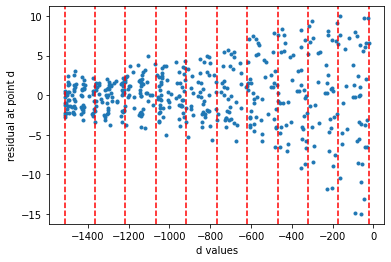

In [127]:
plt.plot(data[:,2],resd, '.')
for edge in bin_edges:
    c = plt.axvline(edge, c='r',linestyle='--')
plt.xlabel('d values')
plt.ylabel('residual at point d')
plt.legend(c,['add'])

In [77]:

Nnew = np.eye(y.shape[0])
for i in range(0, len(bin_edges)-1):
    idx = np.where(np.logical_and(y>bin_edges[i], y<=bin_edges[i+1]))
    Nnew[idx,idx] = bin_std[i]**2
# set the first element separately
idx = np.where(y==bin_edges[0])
Nnew[idx,idx] = bin_std[0]**2
    

In [83]:
Nnew

array([[4.7822538 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.59166617, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.59166617, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.3722924 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.3722924 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.3722924 ]])

In [88]:
y[1]

-1232.221

In [199]:
mcov = lsq.get_param_cov()
merr = np.sqrt(np.diag(mcov))

err_a = merr[0]

err_focus = np.abs(0.25*err_a/a**2)

print(f"Error in focus is {err_focus:4.2f} mm")

Error in focus is 0.15 mm


In [110]:
lsq = leastsq(A,y,Nnew)
lsq.fit()
m = lsq.params

In [111]:
a = m[0]
x0 = -0.5*m[1]/a
y0 = -0.5*m[2]/a
z0 = m[3]-x0**2-y0**2
print(f"params of the paraboloid are:\na\t= {a:4.2e}\nx0\t= {x0:4.2f}\ny0\t= {y0:4.2f}\nz0\t= {z0:4.2f}")

params of the paraboloid are:
a	= 1.67e-04
x0	= 0.31
y0	= 57.13
z0	= -4776.27


In [105]:
ypred = A@m
resd = y-ypred
rmserr = np.sqrt(np.mean(resd**2))
print(rmserr)

3.8955856349071243


In [112]:
chisq = resd.T@np.linalg.inv(Nnew)@resd
print(chisq)

441.27322299715877


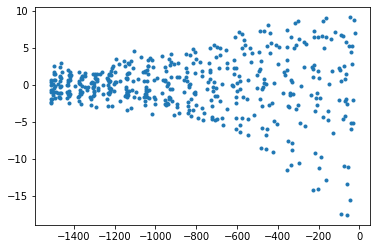

In [107]:
plt.plot(y,resd,'.')

In [103]:
mcov = lsq.get_param_cov()
merr = np.sqrt(np.diag(mcov))

err_a = merr[0]

err_focus = np.abs(0.25*err_a/a**2)

print(f"Error in focus is {err_focus:4.2f} mm")

Error in focus is 0.51 mm


In [104]:
merr

array([5.70074057e-08, 1.08550797e-04, 1.03112960e-04, 1.57378935e-01])

In [223]:
resd

array([-2.42943346e+00, -2.03586312e+00, -2.71298103e+00, -1.83568263e+00,
       -2.51522642e+00, -1.81736913e+00, -2.26316724e+00,  2.46395019e-01,
       -2.48429723e+00, -1.99690284e+00,  7.16041450e+00,  5.41764560e+00,
        5.03358998e+00,  4.21869254e+00,  2.79021503e+00,  1.63808208e+00,
        8.69458094e-01,  4.23432562e-01,  2.49179801e-01, -7.45219909e-01,
       -9.19772334e-01,  1.85511537e+00,  1.64322752e+00,  1.13908286e+00,
       -2.64333768e-01, -2.02478050e+00,  3.67067504e-01,  2.64381091e-01,
        1.23406330e-01,  2.36165139e-02,  2.34573276e-01,  8.89498024e-01,
       -2.22512721e-01, -7.61590219e-01, -3.53637648e-01, -5.23992104e-01,
       -3.11259174e+00, -8.68306734e-02, -3.43793635e+00, -6.52941132e+00,
       -9.55063079e-01, -3.02125630e+00, -6.14292342e+00, -1.24890850e+00,
       -5.57313937e+00, -2.64878358e+00, -6.41021341e+00, -8.42359567e-01,
       -4.12394510e+00, -6.55072933e+00, -1.80761817e+00, -6.19002538e+00,
       -4.29027248e-01, -